[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3   9.3]
 [151.5  41.3  58.5  18.5]
 [180.8  10.8  58.4  12.9]]
2.9388893694594085 [ 0.04576465  0.18853002 -0.00103749]
6月广告投入： [[130.1  87.8  69.2]]
预期销售： [25.37401071]


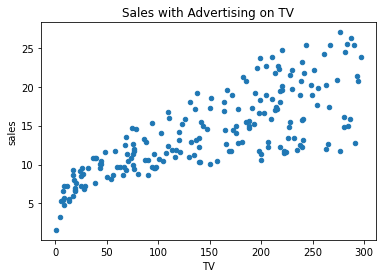

In [31]:
#①读取文件数据至DateFrame的data中②提取前五条
#（序号和销量无关，读取时作为行索引，不用于建模）
import pandas as pd
filename='c:/data/advertising.csv'
data=pd.read_csv(filename,index_col=0)
print(data.iloc[0:5,:].values)

#绘制散点图，用于分析自变量和销量的关系
import matplotlib.pyplot as plt
data.plot(kind='scatter',x='TV',y='Sales',title='Sales with Advertising on TV')
plt.xlabel("TV")
plt.ylabel("sales")

#建立三个自变量和目标变量的线性回归模型
x=data.iloc[:,0:3].values.astype(float)#定义x
y=data.iloc[:,3].values.astype(float)#定义y
from sklearn.linear_model import LinearRegression#导入模型
linreg=LinearRegression()#初始化模型
linreg.fit(x,y)#输入数据，学习模型
print(linreg.intercept_,linreg.coef_)#输出线性回归模型的“截距”，“回归系数”

import joblib#导入joblib这个提供轻量级流水线的工具
joblib.dump(linreg,'linreg.pkl')#将回归模型保存至文件中

#重新加载模型预测数据
import numpy as np
load_linreg=joblib.load('linreg.pkl')#从文件读取模型
new_x=np.array([[130.1,87.8,69.2]])#二维数组
print("6月广告投入：",new_x)
print("预期销售：",load_linreg.predict(new_x))#用模型预测